# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()
cancer = df

(569, 33)


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 32)

In [4]:
#check for null/nan values or the KMeans will not run
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [5]:
#remove nan
df = df.drop('Unnamed: 32', axis=1)
df.shape

(569, 31)

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


In [7]:
corr_matrix = df.corr()
corr_matrix

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [0]:
#create a loop tha will print the highest correlation pairs 
#except the ones that are equal to 1
#for col in corr_matrix:
#  if corr_matrix[corr_matrix[col] == 1]:
#    continue
#  elif corr_matrix[corr_matrix[col] > 0.95]:
#    print(hi)

In [0]:
#select features
features = ['smoothness_mean', 'texture_mean']


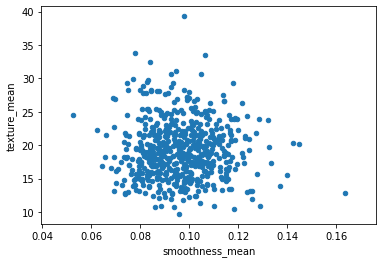

In [10]:
#plot them
df[features].plot(kind='scatter', x=features[0], y=features[1]);

In [0]:
#initialize an instance of the kMeans class form sklearn
k=2
model = KMeans(n_clusters=k, max_iter=1)

In [12]:
#fit the instantiated model to our sliced dataframe
model.fit(df[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#assign cluster back to our dataframe:
df['clusters'] = model.labels_

In [0]:
#get our centeroids
centeroids = model.cluster_centers_

In [15]:
#turn them into a dataframe
cc = pd.DataFrame(centeroids)
cc.head()

,0,1
0,0.095828,16.558818
1,0.097192,23.558108


In [0]:
#setup colors for plotting
base_colors = ['r', 'g']
colors = [base_colors[centeroids] for centeroids in model.labels_]

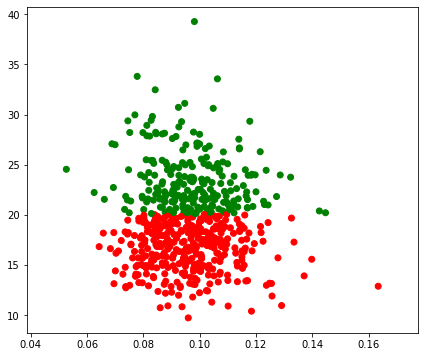

In [17]:
#plot the scatter of our points with calculated centeroids
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [18]:

# what's our silhouette score?
metrics.silhouette_score(df, model.labels_, metric='euclidean')

0.11992437027592563

#elbow

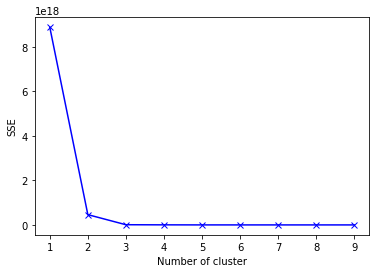

In [19]:
#applying the elbow method
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

#sum of squared erros/distances SSE
#sse = []
sse = {}
for k in range(1,10):
  #print(df)
  kmeans = KMeans(n_clusters=k).fit(df)
  df['clusters'] = kmeans.labels_ #labels of each point
  #print(df['clusters'])
  #alternatively
  #sse.append(km.inertia_)
  sse[k] = kmeans.inertia_ #Inertia: Sum of square distances of samples to their closest cluster center

#plot the elbow results
plt.figure()
#alternatively
#plt.plot(k, sse)
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show()


#the elbow is 2

In [20]:
#Using the silhouette coefficient
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.9753276628229735
For n_clusters=3, The Silhouette Coefficient is 0.9668191442631776
For n_clusters=4, The Silhouette Coefficient is 0.9765666110737622
For n_clusters=5, The Silhouette Coefficient is 0.9734627271677392
For n_clusters=6, The Silhouette Coefficient is 0.9223307796756094
For n_clusters=7, The Silhouette Coefficient is 0.9303125364960602
For n_clusters=8, The Silhouette Coefficient is 0.932265899352696
For n_clusters=9, The Silhouette Coefficient is 0.9381805469431611
For n_clusters=10, The Silhouette Coefficient is 0.9305745817912339


###A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. in this case n_cluster=4 has the hieghest, but here is the catch, our results are anticipating 2 types of cancer results, Malignant and its opposite benign, so therefore we will consider n_cluster=2 as the optimal number.

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [21]:
# Your Code Here
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
df_coded = cancer.replace({'M':1, 'B':0})

In [0]:
def check(data, col):
  num_correct_labels = data[col].sum()
  num_total_obs = len(data[col])
  return num_correct_labels/num_total_obs

In [24]:
check(df_coded, 'diagnosis')

0.37258347978910367

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



#Resources
[https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c](https://)

In [0]:
#first standarize the data
from sklearn.preprocessing import StandardScaler

df_coded.head()
df_cleaned = df_coded.drop('Unnamed: 32', axis=1)

In [26]:
#check for null values
df_cleaned.isnull().sum().any()

False

In [27]:
df_cleaned.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [28]:
#Let's do a manual calculation to reinforce the behind the hoood of PCA
#check for number of categorical and numeric columns
cat_cols = df_cleaned.columns[df_cleaned.dtypes=='object'] & df_cleaned.columns[df_cleaned.dtypes=="string"]
num_cols = df_cleaned.columns[df_cleaned.dtypes != 'object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')


0 categorical columns
32 numerical columns


In [0]:
# there are no categorical cols so there is no need to cast them to a "category" data type
# this is how you would do it:
#df_cleaned[cat_cols] = df_cleaned[cat_cols].astype('category')
#df_cleaned.dtypes


In [0]:
#Then replace cat cells with numeric values
#for col in cat_cols:
#  df_cleaned[col] = df_cleaned[col].cat.codes

#df_cleaned.head()
#df_cleaned.dtypes

In [30]:
#now lets get the means manually and find the difference to each point
means = np.mean(df_cleaned)
centered = df_cleaned - means
centered.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-2.952953e+07,0.627417,3.862708,-8.909649,30.830967,346.110896,0.02204,0.173259,0.211301,0.098181,0.060738,0.015912,0.689828,-0.311553,5.722941,113.062921,-0.000642,0.023562,0.021836,0.004074,0.009488,0.002398,9.11081,-8.347223,77.338787,1138.416872,0.029831,0.411335,0.439712,0.150794,0.170024,0.034954
1,-2.952931e+07,0.627417,6.442708,-1.519649,40.930967,671.110896,-0.01162,-0.025701,-0.001899,0.021251,0.000038,-0.006128,0.138328,-0.482953,0.531941,33.742921,-0.001816,-0.012398,-0.013294,0.001604,-0.006652,-0.000263,8.72081,-2.267223,51.538787,1075.416872,-0.008569,-0.067665,-0.030588,0.071394,-0.015076,0.005074
2,5.392907e+07,0.627417,5.562708,1.960351,38.030967,548.110896,0.01324,0.055559,0.108601,0.078981,0.025738,-0.002808,0.340428,-0.429953,1.718941,53.692921,-0.000891,0.014582,0.006426,0.008784,0.001958,0.000776,7.30081,-0.147223,45.238787,828.416872,0.012031,0.170235,0.178212,0.128394,0.071224,0.003634
3,5.397647e+07,0.627417,-2.707292,1.090351,-14.389033,-268.789104,0.04614,0.179559,0.152601,0.056281,0.078538,0.034642,0.090428,-0.060853,0.578941,-13.107079,0.002069,0.049102,0.024716,0.006874,0.039088,0.005413,-1.35919,0.822777,-8.391213,-312.883128,0.077431,0.612035,0.414712,0.142894,0.373724,0.089054
4,5.398657e+07,0.627417,6.162708,-4.949649,43.130967,642.110896,0.00394,0.028459,0.109201,0.055381,-0.000262,-0.003968,0.352028,-0.435553,2.571941,54.102921,0.004449,-0.000868,0.024986,0.007054,-0.002982,0.001320,6.27081,-9.007223,44.938787,694.416872,0.005031,-0.049265,0.127812,0.047894,-0.053676,-0.007166


In [31]:
#check that the means of each column will be zero
check_means= np.mean(centered)
check_means.head()

id               -1.560825e-08
diagnosis        -1.084858e-16
radius_mean      -1.106087e-14
texture_mean     -2.848415e-14
perimeter_mean   -1.723285e-14
dtype: float64

In [32]:
stdev = np.std(centered)
standarized = centered/stdev
standarized.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [33]:
#check the standard deviation and it should be 1
check_stdev = np.std(standarized)
check_stdev

id                         1.0
diagnosis                  1.0
radius_mean                1.0
texture_mean               1.0
perimeter_mean             1.0
area_mean                  1.0
smoothness_mean            1.0
compactness_mean           1.0
concavity_mean             1.0
concave points_mean        1.0
symmetry_mean              1.0
fractal_dimension_mean     1.0
radius_se                  1.0
texture_se                 1.0
perimeter_se               1.0
area_se                    1.0
smoothness_se              1.0
compactness_se             1.0
concavity_se               1.0
concave points_se          1.0
symmetry_se                1.0
fractal_dimension_se       1.0
radius_worst               1.0
texture_worst              1.0
perimeter_worst            1.0
area_worst                 1.0
smoothness_worst           1.0
compactness_worst          1.0
concavity_worst            1.0
concave points_worst       1.0
symmetry_worst             1.0
fractal_dimension_worst    1.0
dtype: f

In [0]:
# the centered and standarized matrix is called Matrix Z

In [35]:
#Covariance is a measure of how changes in one variable are associated with changes in a second variable. 
#It's a measure of how they Co (together) Vary (move) or how they move in relation
#to each other

#covariance = Z.T*Z

Z = standarized

covarianse = Z.cov()
covarianse.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.001761,0.039839,0.074758,0.099946,0.073288,0.097063,-0.012991,0.000096,0.050168,0.044236,-0.022153,-0.052604,0.143299,-0.007539,0.137573,0.178055,0.096951,0.034021,0.055337,0.078907,-0.017337,0.025771,0.082550,0.064833,0.080127,0.107375,0.010356,-0.002973,0.023244,0.035236,-0.044302,-0.029918
diagnosis,0.039839,1.001761,0.731314,0.415916,0.743943,0.710232,0.359191,0.597584,0.697586,0.777981,0.331080,-0.012860,0.568132,-0.008318,0.557120,0.549201,-0.067134,0.293515,0.254176,0.408761,-0.006533,0.078110,0.777821,0.457707,0.784293,0.735117,0.422207,0.592039,0.660771,0.794963,0.417027,0.324442
radius_mean,0.074758,0.731314,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,0.680286,-0.097489,0.675359,0.737159,-0.222992,0.206363,0.194546,0.376831,-0.104505,-0.042716,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
texture_mean,0.099946,0.415916,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,0.276354,0.387038,0.282169,0.260302,0.006625,0.192313,0.143545,0.164139,0.009143,0.054553,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
perimeter_mean,0.073288,0.743943,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,0.692983,-0.086914,0.694355,0.746294,-0.203051,0.251185,0.228484,0.407934,-0.081773,-0.005533,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108


In [36]:
#calculate eigenvectors and their corresponding eigenvalues of the covariance
evalues, evectors = np.linalg.eig(covarianse)
evectors

array([[-2.20132922e-02, -3.23675385e-02,  9.79034765e-02, ...,
         8.90848848e-05,  7.50778692e-04, -3.94646593e-05],
       [-2.16835592e-01, -7.70349679e-02, -1.04562282e-01, ...,
         1.35318043e-03,  5.64185167e-03, -1.96326330e-03],
       [-2.16404027e-01, -2.26045159e-01, -2.70960919e-04, ...,
         7.02498591e-01,  2.06906549e-01,  2.12831390e-01],
       ...,
       [-2.46161454e-01, -1.78544102e-03, -1.62801516e-01, ...,
        -2.33420367e-03,  3.46780933e-02,  2.27716088e-02],
       [-1.20461432e-01,  1.42764783e-01, -2.71611002e-01, ...,
         2.99451106e-04,  1.28191676e-02,  5.13414698e-03],
       [-1.26524229e-01,  2.76795104e-01, -2.29383010e-01, ...,
         1.68209443e-03,  1.04995787e-02, -2.31595480e-02]])

In [37]:
#decompose ZTZ into PDP_inverse
P = evectors.T.dot(Z.T)
P
#the answer below does not like the covariance matrix 

array([[-9.21672415e+00, -2.65124379e+00, -5.90069721e+00, ...,
        -1.52575420e+00, -1.03958324e+01,  5.50787608e+00],
       [ 2.13674957e+00, -3.77074095e+00, -1.01091626e+00, ...,
        -1.95055191e+00,  1.87122919e+00, -7.67805093e-01],
       [-9.96665899e-01, -5.54318762e-01, -4.67841177e-01, ...,
         4.37067788e-01, -1.80835340e+00,  1.35516174e+00],
       ...,
       [ 4.69111618e-02,  2.27199798e-03, -1.09713137e-03, ...,
        -2.59519020e-03,  2.20670867e-02,  1.98719777e-02],
       [ 4.38035721e-02, -4.07798185e-03,  1.68091665e-03, ...,
         1.13331175e-02, -9.04129946e-02, -5.85094124e-02],
       [-3.31017108e-02,  3.19299306e-02,  4.75449910e-02, ...,
        -4.27923258e-03, -6.61204138e-02, -1.06596819e-02]])

In [0]:
#let's do a reduced version 
reduced = df_cleaned[['radius_mean', 'area_mean']]

In [39]:
#do the entire proces above again
means = np.mean(reduced)
centered = reduced-means
stdev = np.std(centered)
standarized = centered/stdev
standarized.head()

,radius_mean,area_mean
0,1.097064,0.984375
1,1.829821,1.908708
2,1.579888,1.558884
3,-0.768909,-0.764464
4,1.750297,1.826229


In [40]:
Z = standarized
covarianse = Z.cov()
evalues, evectors = np.linalg.eig(covarianse)
evectors

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [41]:
P = evectors.T.dot(Z.T)
P

array([[-0.07968321,  0.05578199, -0.01485241, ..., -0.08791572,
        -0.072919  ,  0.32570187],
       [-1.47179955, -2.64353911, -2.21944679, ..., -0.90526419,
        -2.52688782,  2.23176369]])

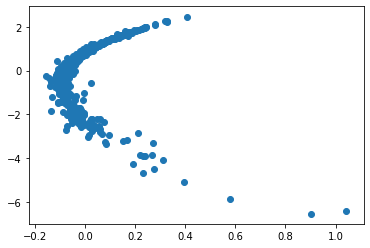

In [42]:
plt.scatter(*P)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project